<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/ML_Assignment_FN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing Libraries

In [1]:
!pip install plotly==5.11.0
!pip install -U kaleido

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm.notebook import tqdm


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not ins

#reading the dataset

In [2]:

df =  pd.read_csv('/content/bank-full.csv', sep = ';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#dataset information

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#shape of dataset

In [5]:

df.shape

(45211, 17)

#Checking Null values for each columns

In [6]:

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Visualize the distribution of the target variable

In [7]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

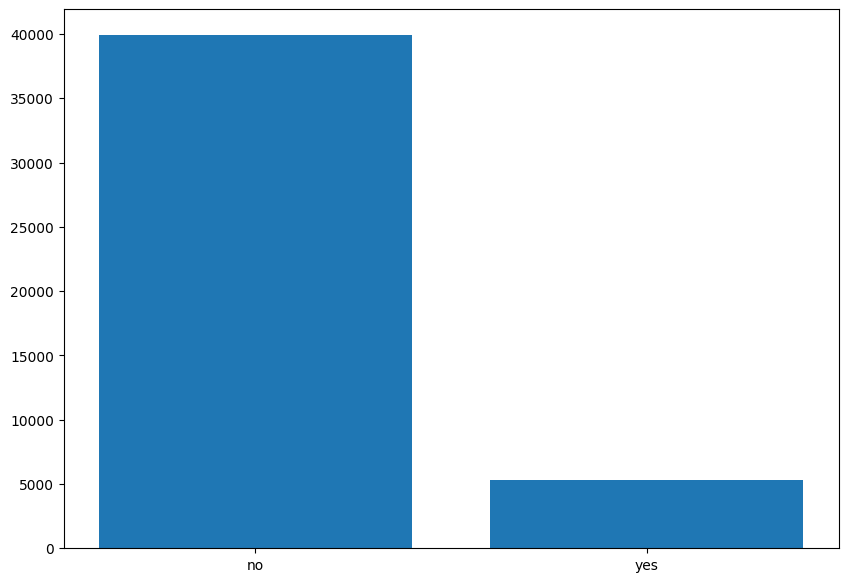

In [8]:

no = ["no","yes"]
yes = [39922,5289]
fig = plt.figure(figsize =(10, 7))
plt.bar(no, yes)
plt.show()

#one hot encoding

In [9]:
#Checking data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
#Automated encoding which column data type is object or cetagorial excepting our target column

for col in df.columns:
  if col!='y' and str(df[col].dtypes)=="object":
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df,dummies],axis='columns').drop([col], axis='columns')

In [16]:
df.shape

(45211, 52)

In [17]:
df

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [18]:
#Checking data types again
df.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
y                int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
unknown          uint8
divorced         uint8
married          uint8
single           uint8
primary          uint8
secondary        uint8
tertiary         uint8
unknown          uint8
no               uint8
yes              uint8
no               uint8
yes              uint8
no               uint8
yes              uint8
cellular         uint8
telephone        uint8
unknown          uint8
apr              uint8
aug              uint8
dec              uint8
feb              uint8
jan              uint8
jul              uint8
jun              uint8
mar        

In [21]:
#label encoding taregt column (not onehot encoding)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["y"]=encoder.fit_transform(df["y"])

#Spliting dataset Into X and y

In [22]:
X = df.loc[:,df.columns!="y"]
y = df['y']

In [23]:
X.shape

(45211, 51)

#Scaling The Data

In [24]:


from sklearn.preprocessing import StandardScaler

col = X.columns
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = col)

#Data Splitting
Divide the dataset into a training set (70%), a validation set (15%), and a test set (15%)

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=0)

#we divided 70:30 = train:test_val. Now we have 70% data in our test set. Then we devided 30% into half. So we have 15% of total data in trest and validation.
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=0)


In [26]:
X_train.shape[0],X_val.shape[0],X_test.shape[0]

(31647, 6782, 6782)

#Data balancing Using SMOTE (Over sampling)

In [27]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train)

In [28]:
y_train.value_counts()

0    27953
1    27953
Name: y, dtype: int64

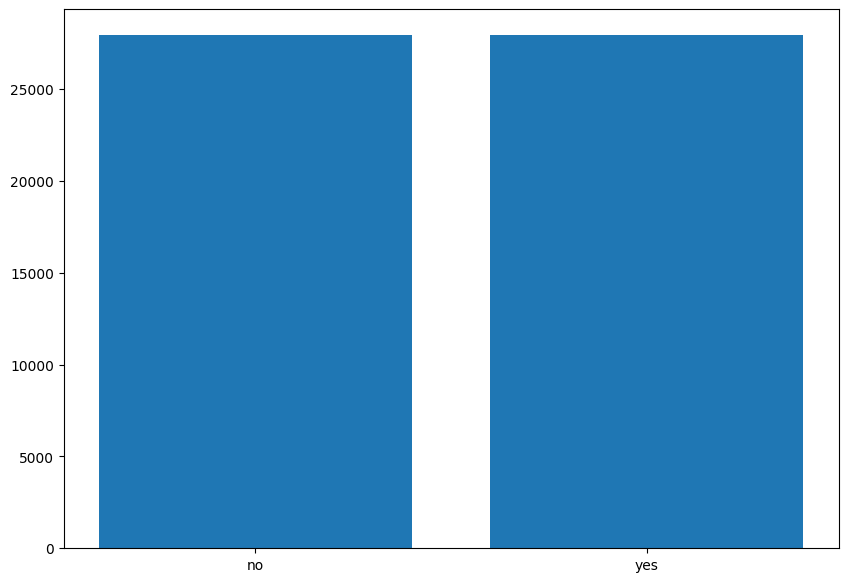

In [29]:
no = ["no","yes"]
yes = [27953,27953]
fig = plt.figure(figsize =(10, 7))
plt.bar(no, yes)
plt.show()

#Model Selection & Training:

##ADABOOST

###For Deafult Hyparameters

In [222]:

from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier()
ada_defult.fit(X_train, y_train)
y_pred_val = ada_defult.predict(X_val)


print("Accurecy: ",accuracy_score(y_val, y_pred_val))

Accurecy:  0.8687702742553819


###Tunning `n_estimators`(done)

  0%|          | 0/31 [00:00<?, ?it/s]

1/151 round completed......................... Val Accuracy: 0.6368327926865232 >>>>>>Train Accuracy: 0.7413157800593854
6/151 round completed......................... Val Accuracy: 0.7820701857859038 >>>>>>Train Accuracy: 0.8160841412370765
11/151 round completed......................... Val Accuracy: 0.82217634915954 >>>>>>Train Accuracy: 0.8416270167781633
16/151 round completed......................... Val Accuracy: 0.8341197286936007 >>>>>>Train Accuracy: 0.8555253461166958
21/151 round completed......................... Val Accuracy: 0.8416396343261575 >>>>>>Train Accuracy: 0.876077701856688
26/151 round completed......................... Val Accuracy: 0.8494544382188145 >>>>>>Train Accuracy: 0.8771330447536937
31/151 round completed......................... Val Accuracy: 0.8630197581834267 >>>>>>Train Accuracy: 0.8860766286266233
36/151 round completed......................... Val Accuracy: 0.8583013860218225 >>>>>>Train Accuracy: 0.8854863520910099
41/151 round completed.......

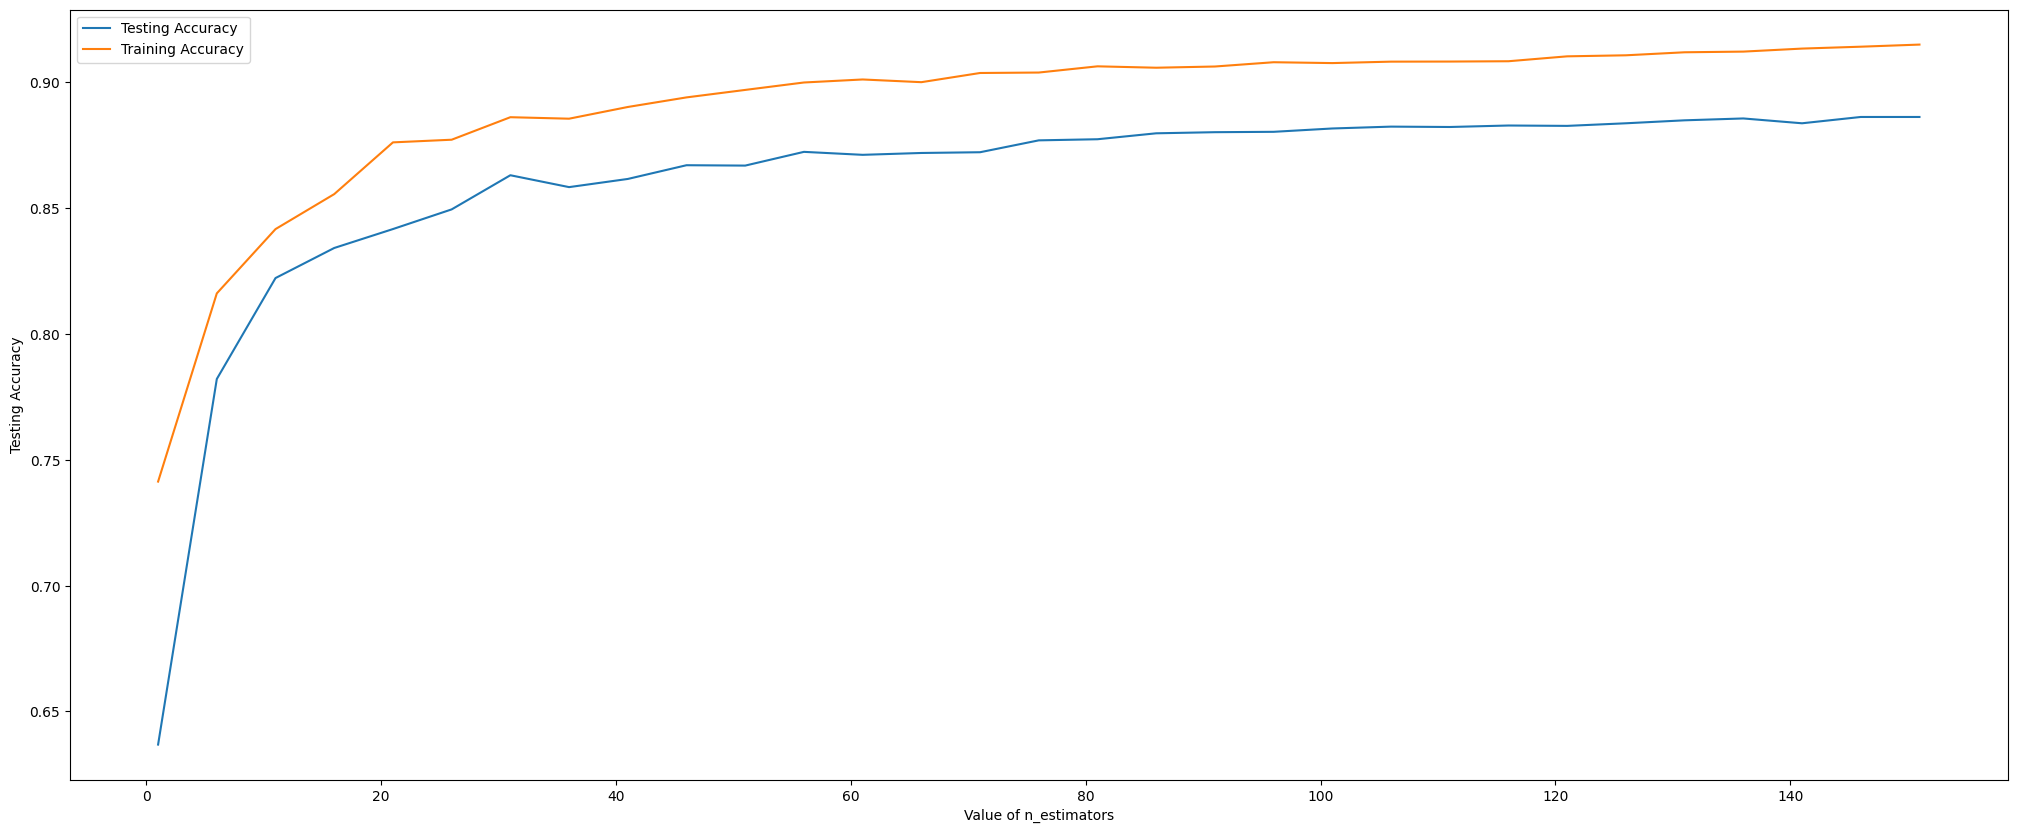

In [223]:
from sklearn.ensemble import AdaBoostClassifier
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
score_list_train = []
for k in tqdm(k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  score_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu),">>>>>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,score_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [225]:
ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5995
           1       0.49      0.63      0.55       787

    accuracy                           0.88      6782
   macro avg       0.72      0.77      0.74      6782
weighted avg       0.90      0.88      0.89      6782

Accurecy:  0.8817457976997936


##Graddient Boosting

###Deafult Hyperparameters

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_default = GradientBoostingClassifier()
gradBoost_default.fit(X_train, y_train)
y_pred_val = gradBoost_default.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5354  620]
 [ 219  589]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5974
           1       0.49      0.73      0.58       808

    accuracy                           0.88      6782
   macro avg       0.72      0.81      0.76      6782
weighted avg       0.90      0.88      0.89      6782

Accurecy:  0.8762901798879387


###Tunning `n_estimators`

  0%|          | 0/80 [00:00<?, ?it/s]

1/400 round completed.........................Val Accurecy: 0.7233854320259511  >>>Train Accuracy: 0.8063892963188208
6/400 round completed.........................Val Accurecy: 0.7680625184311413  >>>Train Accuracy: 0.8295352913819626
11/400 round completed.........................Val Accurecy: 0.7965202005308168  >>>Train Accuracy: 0.8404643508746825
16/400 round completed.........................Val Accurecy: 0.8030079622530227  >>>Train Accuracy: 0.8469395055986835
21/400 round completed.........................Val Accurecy: 0.8150987909171336  >>>Train Accuracy: 0.8577612420849283
26/400 round completed.........................Val Accurecy: 0.8237982895900914  >>>Train Accuracy: 0.868851286087361
31/400 round completed.........................Val Accurecy: 0.8295488056620466  >>>Train Accuracy: 0.8762207991986549
36/400 round completed.........................Val Accurecy: 0.8339722795635506  >>>Train Accuracy: 0.8821235645547884
41/400 round completed.........................Val 

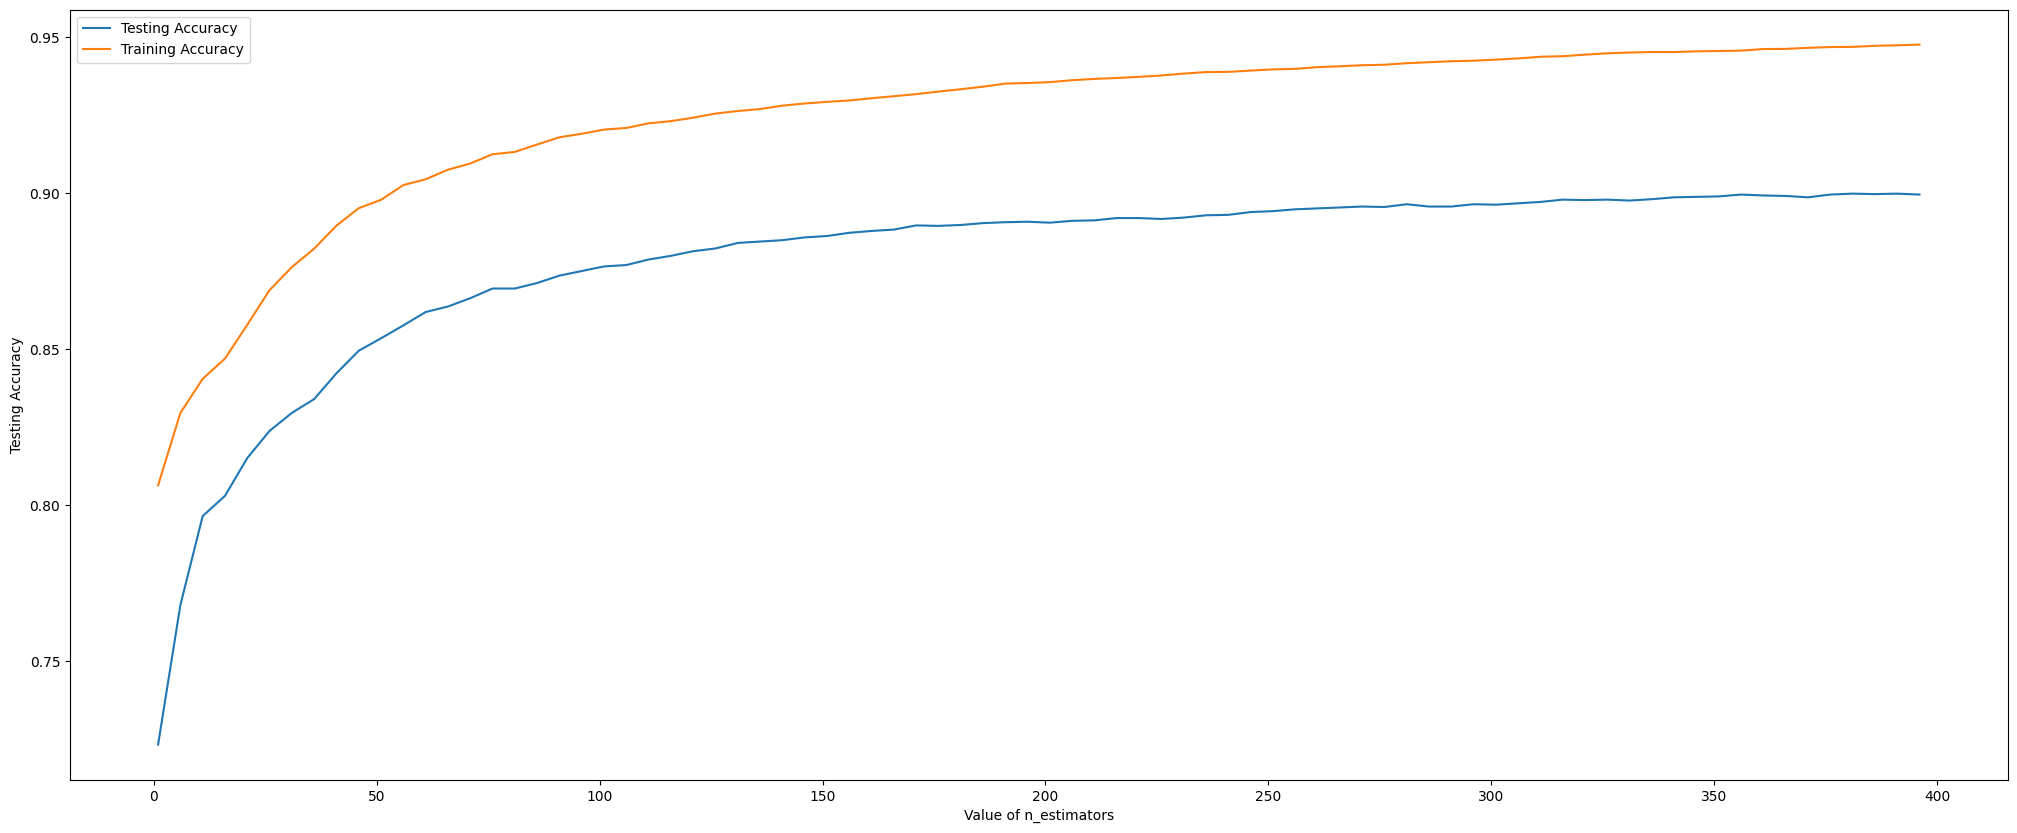

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=400
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_val)
  val_accu =  accuracy_score(y_val,y_pred)
  scores[k] =val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed.........................Val Accurecy: "+str(val_accu)," >>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth` (done)

  0%|          | 0/10 [00:00<?, ?it/s]

1/50 round completed.........................Val Accuracy: 0.8257151282807431  Training Accuracy0.8647193503380675
6/50 round completed.........................Val Accuracy: 0.8920672368033029  Training Accuracy0.9506671913569206
11/50 round completed.........................Val Accuracy: 0.9038631672073135  Training Accuracy0.994293993489071
16/50 round completed.........................Val Accuracy: 0.8956060159245061  Training Accuracy1.0
21/50 round completed.........................Val Accuracy: 0.8911825420230021  Training Accuracy1.0
26/50 round completed.........................Val Accuracy: 0.8703922146859333  Training Accuracy1.0
31/50 round completed.........................Val Accuracy: 0.8646416986139782  Training Accuracy1.0
36/50 round completed.........................Val Accuracy: 0.8646416986139782  Training Accuracy1.0
41/50 round completed.........................Val Accuracy: 0.865526393394279  Training Accuracy1.0
46/50 round completed.........................Val 

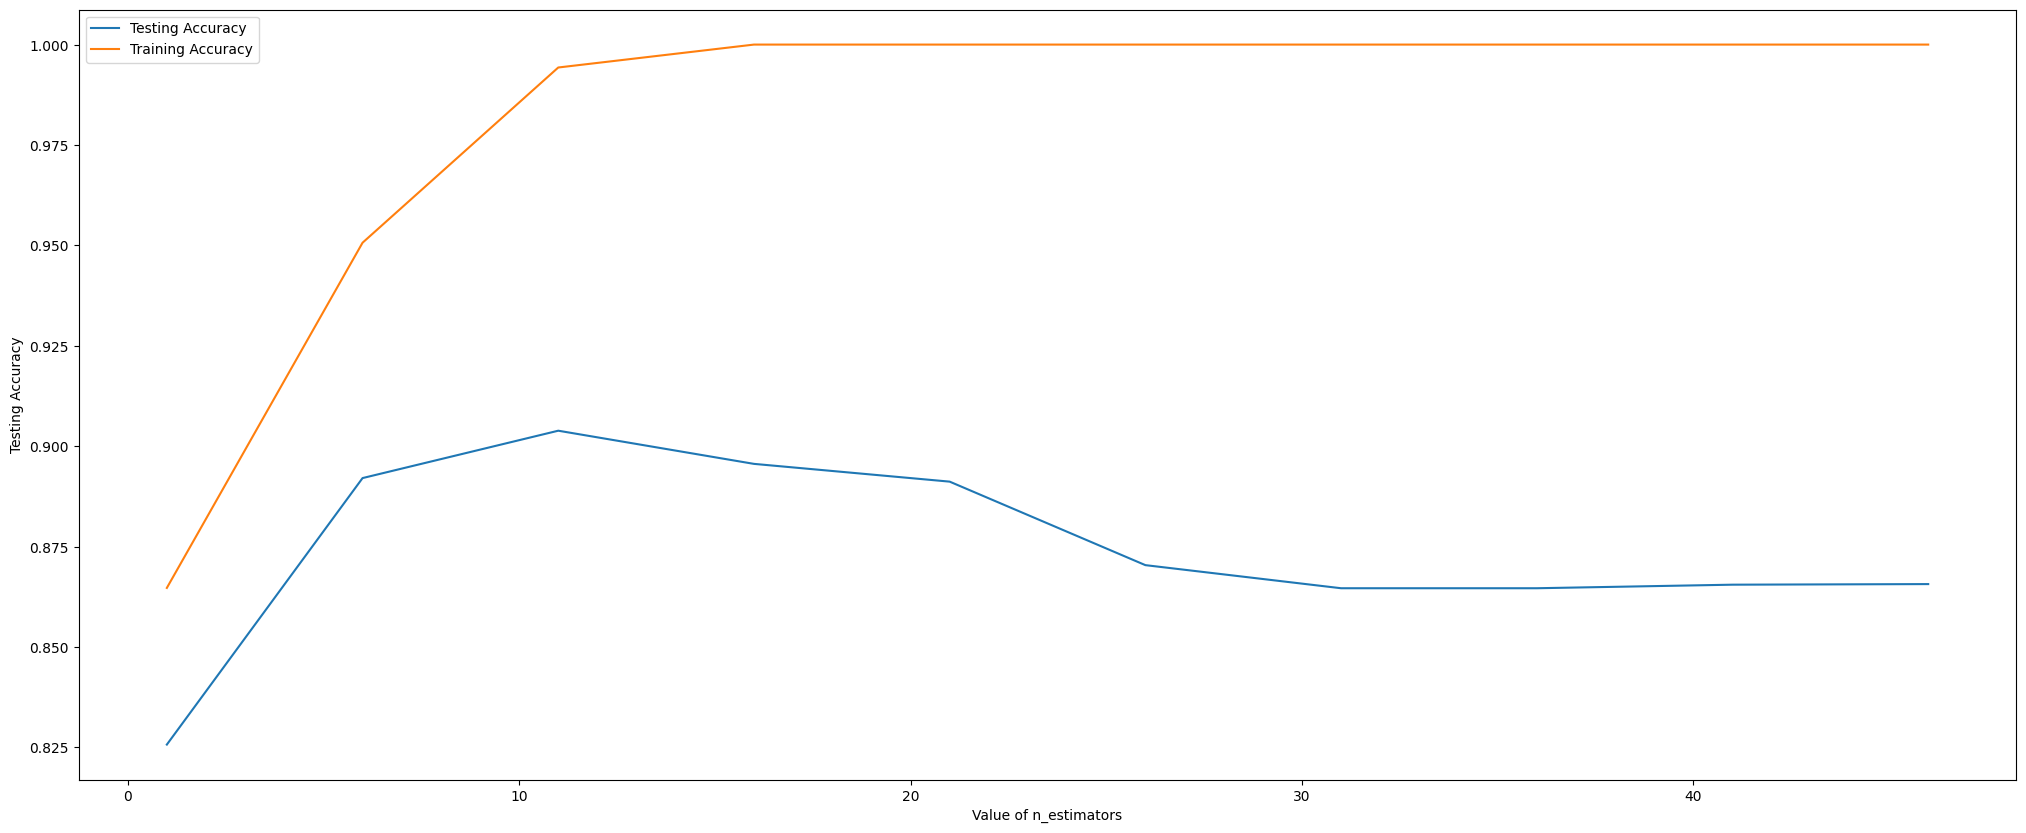

In [228]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu =  accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed.........................Val Accuracy: "+str(val_accu)," Training Accuracy"+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [229]:
#381

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.898849896785609


In [230]:
#6

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.8970805072250073


In [231]:
#6,381
gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.90002948982601


##XGB

###Deafult Hyperparameters

In [232]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier()
xgb_deafult.fit(X_train.values,y_train.values)
y_pred_val = xgb_deafult.predict(X_val.values)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5650  324]
 [ 363  445]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5974
           1       0.58      0.55      0.56       808

    accuracy                           0.90      6782
   macro avg       0.76      0.75      0.75      6782
weighted avg       0.90      0.90      0.90      6782

Accurecy:  0.8987024476555588


###Tunning `n_estimators` (done)

  0%|          | 0/50 [00:00<?, ?it/s]

1/250 round completed......................... Val Accureay: 0.827779416101445  >>>>>>Training Accuracy: 0.8583694057882875
6/250 round completed......................... Val Accureay: 0.841197286936007  >>>>>>Training Accuracy: 0.8927306550280828
11/250 round completed......................... Val Accureay: 0.8591860808021232  >>>>>>Training Accuracy: 0.90984867456087
16/250 round completed......................... Val Accureay: 0.8754054851076378  >>>>>>Training Accuracy: 0.925607269344972
21/250 round completed......................... Val Accureay: 0.8798289590091418  >>>>>>Training Accuracy: 0.9328694594497907
26/250 round completed......................... Val Accureay: 0.8848422294308463  >>>>>>Training Accuracy: 0.9387722248059243
31/250 round completed......................... Val Accureay: 0.8863167207313477  >>>>>>Training Accuracy: 0.942617965871284
36/250 round completed......................... Val Accureay: 0.8925095841934533  >>>>>>Training Accuracy: 0.9465173684398812


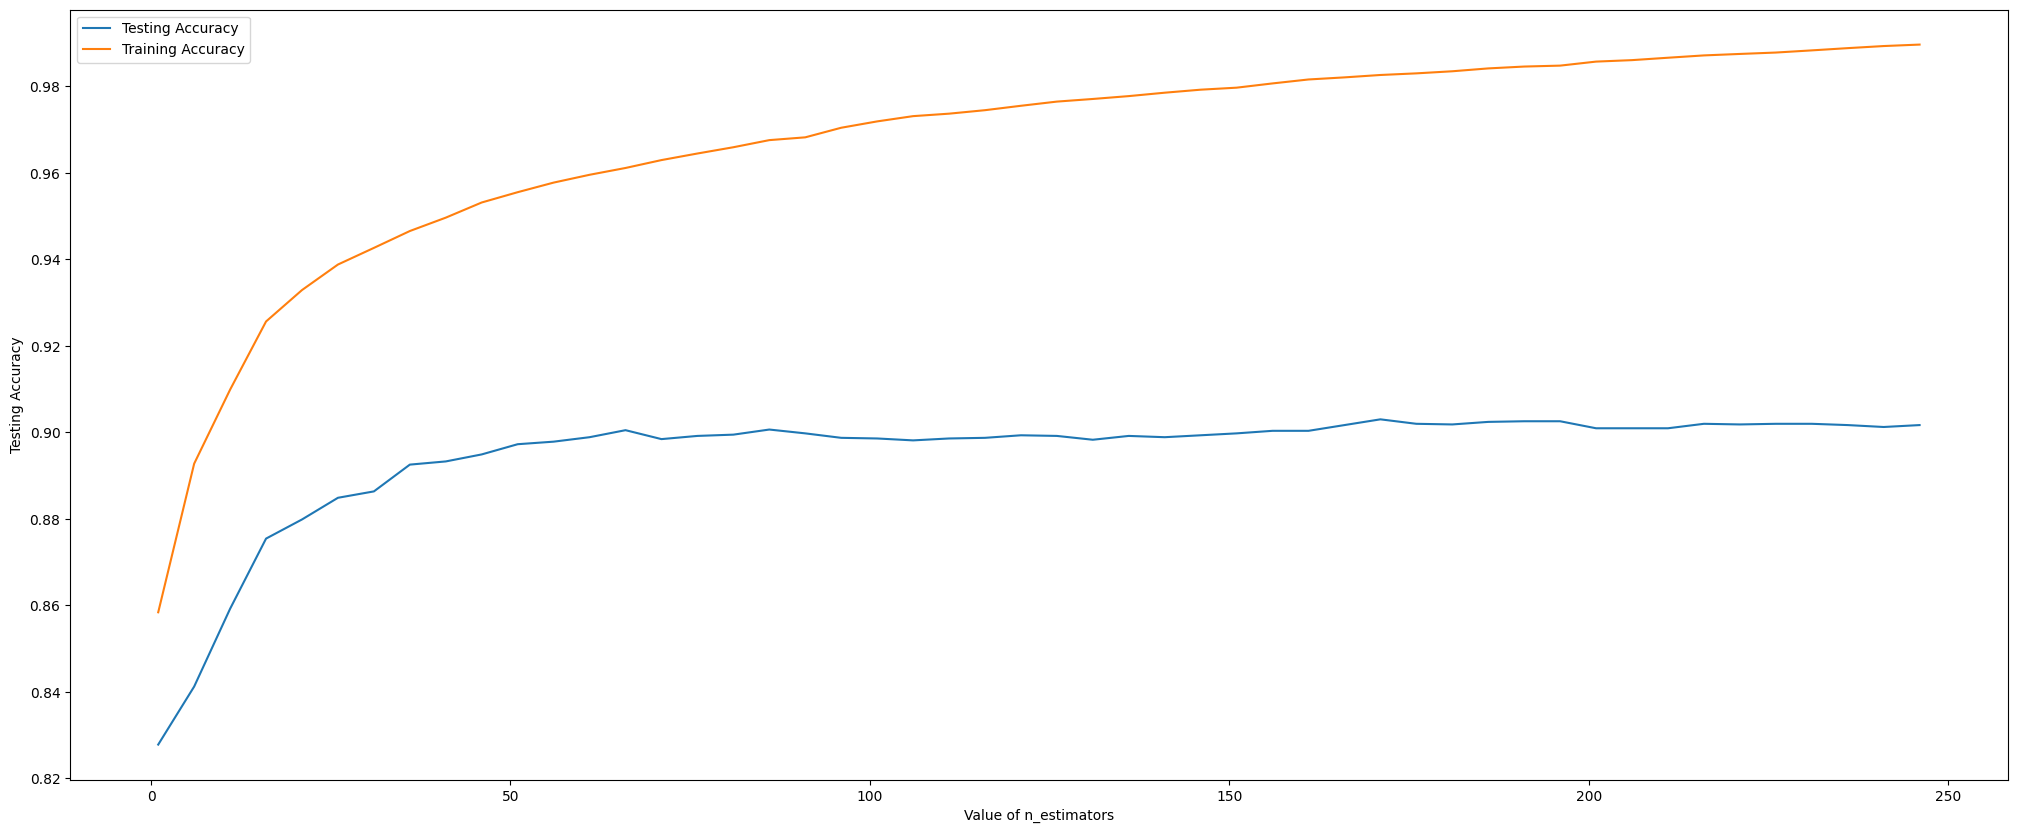

In [233]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accureay: "+str(val_accu)," >>>>>>Training Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth`(done)

  0%|          | 0/20 [00:00<?, ?it/s]

1/100 round completed......................... Val Accuracy: 0.8537304629902683  >>>>>>> Train Accuracy: 0.8883661860980933
6/100 round completed......................... Val Accuracy: 0.8987024476555588  >>>>>>> Train Accuracy: 0.9715772904518298
11/100 round completed......................... Val Accuracy: 0.9038631672073135  >>>>>>> Train Accuracy: 0.9989625442707402
16/100 round completed......................... Val Accuracy: 0.897817752875258  >>>>>>> Train Accuracy: 1.0
21/100 round completed......................... Val Accuracy: 0.9017988793866116  >>>>>>> Train Accuracy: 1.0
26/100 round completed......................... Val Accuracy: 0.8995871424358596  >>>>>>> Train Accuracy: 1.0
31/100 round completed......................... Val Accuracy: 0.9012090828664111  >>>>>>> Train Accuracy: 1.0
36/100 round completed......................... Val Accuracy: 0.8995871424358596  >>>>>>> Train Accuracy: 1.0
41/100 round completed......................... Val Accuracy: 0.90002948982601

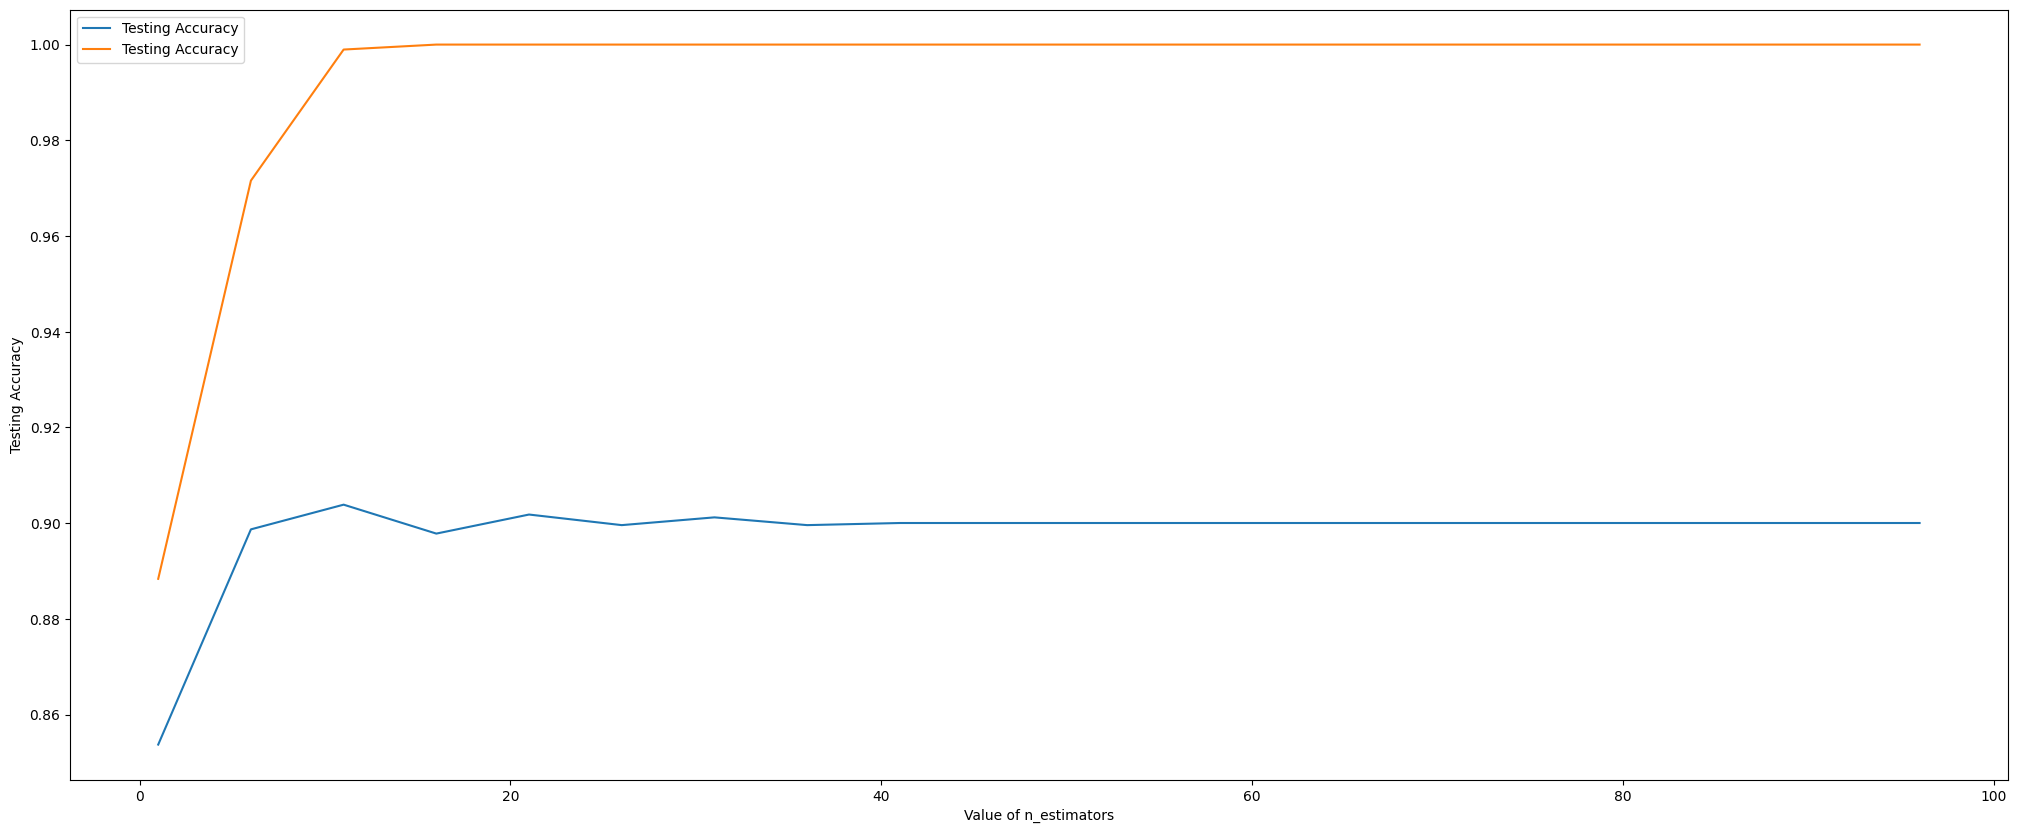

In [234]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=100
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [235]:
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9003243880861103


In [236]:

xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9020937776467118


In [237]:

xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)

print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9001769389560602


##RandomForestClassifier

###Deafult Hyperparameters

In [238]:

from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_val=rf_default.predict(X_val)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5613  361]
 [ 346  462]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5974
           1       0.56      0.57      0.57       808

    accuracy                           0.90      6782
   macro avg       0.75      0.76      0.75      6782
weighted avg       0.90      0.90      0.90      6782

Accurecy:  0.8957534650545562


###Tunning `n_estimators` (done)

1/250 round completed......................... Val Accuracy: 0.8457682099675612  >>>>>>> Train Accuracy: 0.9632060959467678
6/250 round completed......................... Val Accuracy: 0.8883810085520495  >>>>>>> Train Accuracy: 0.9939183629664079
11/250 round completed......................... Val Accuracy: 0.8913299911530522  >>>>>>> Train Accuracy: 0.9982112832254141
16/250 round completed......................... Val Accuracy: 0.8984075493954585  >>>>>>> Train Accuracy: 0.9991414159481987
21/250 round completed......................... Val Accuracy: 0.8926570333235034  >>>>>>> Train Accuracy: 0.9996064823095911
26/250 round completed......................... Val Accuracy: 0.897817752875258  >>>>>>> Train Accuracy: 0.9997674668193038
31/250 round completed......................... Val Accuracy: 0.8938366263639045  >>>>>>> Train Accuracy: 0.9998747898257789
36/250 round completed......................... Val Accuracy: 0.8957534650545562  >>>>>>> Train Accuracy: 0.9999284513290165
41/

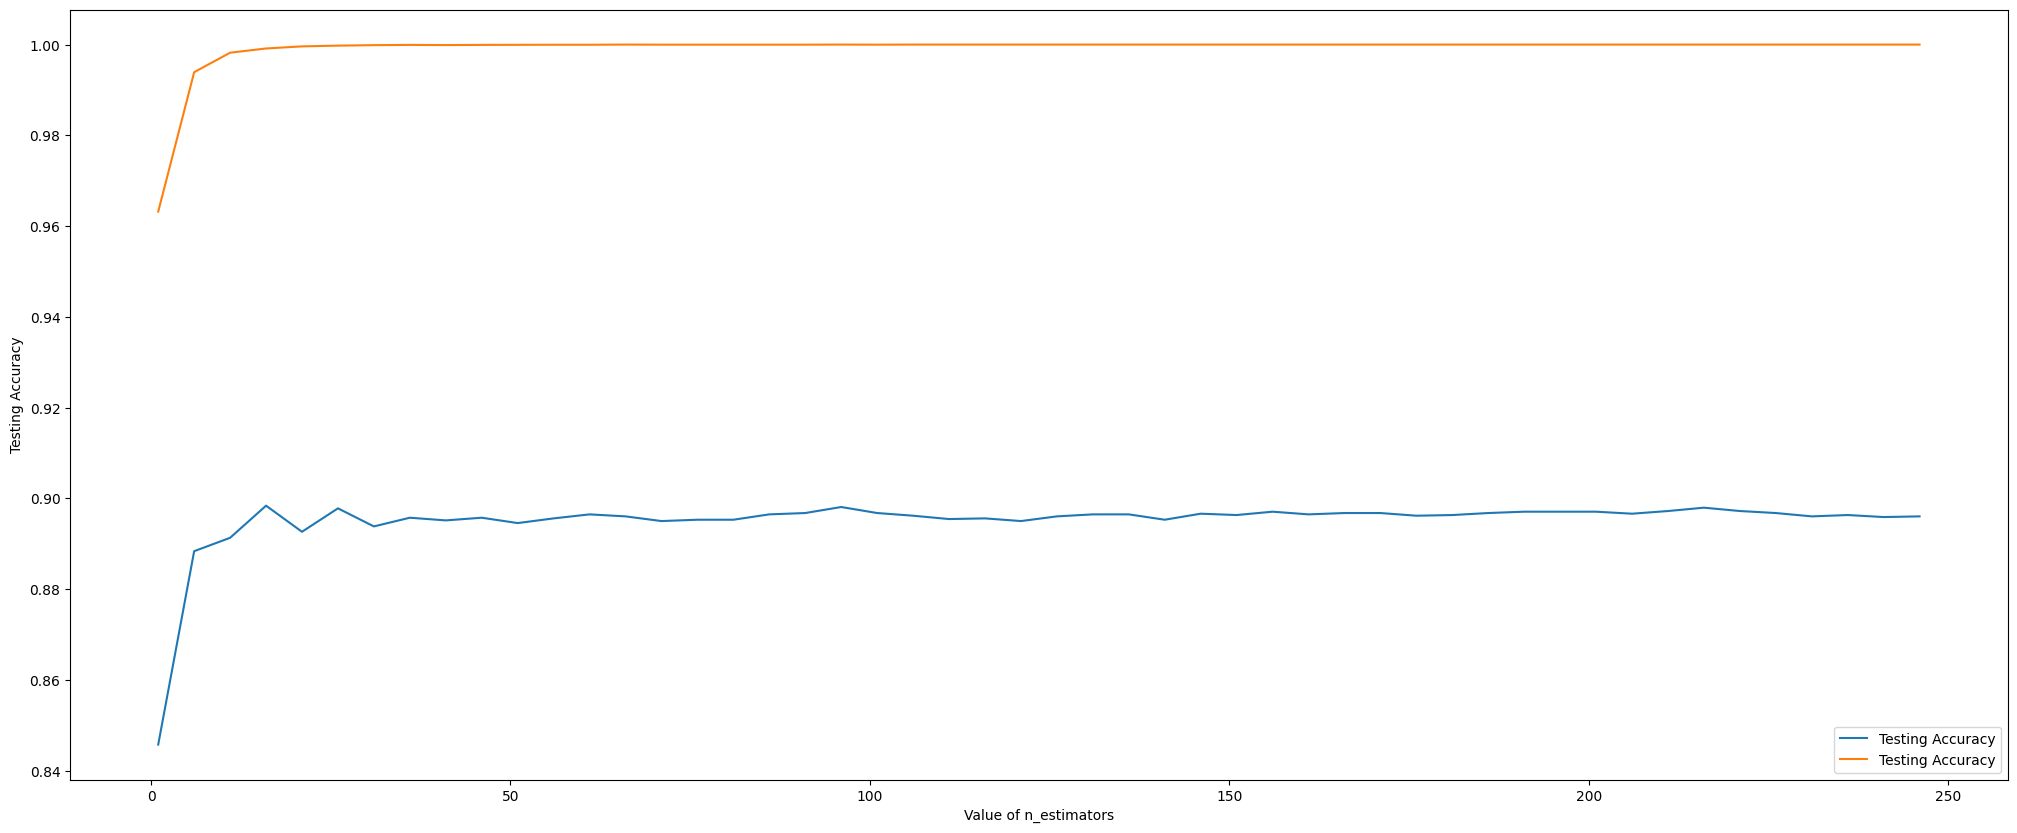

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth`(done)

1/50 round completed......................... Val Accuracy: 0.6931583603656738  >>>>>>> Train Accuracy: 0.7348406253353844
6/50 round completed......................... Val Accuracy: 0.8351518726039516  >>>>>>> Train Accuracy: 0.8866311308267449
11/50 round completed......................... Val Accuracy: 0.8528457682099676  >>>>>>> Train Accuracy: 0.9211891389117447
16/50 round completed......................... Val Accuracy: 0.8749631377174875  >>>>>>> Train Accuracy: 0.9632955317854971
21/50 round completed......................... Val Accuracy: 0.8897080507225007  >>>>>>> Train Accuracy: 0.9897506528816227
26/50 round completed......................... Val Accuracy: 0.8908876437629017  >>>>>>> Train Accuracy: 0.9983901549028726
31/50 round completed......................... Val Accuracy: 0.8947213211442052  >>>>>>> Train Accuracy: 0.9998926769935248
36/50 round completed......................... Val Accuracy: 0.8941315246240047  >>>>>>> Train Accuracy: 1.0
41/50 round completed....

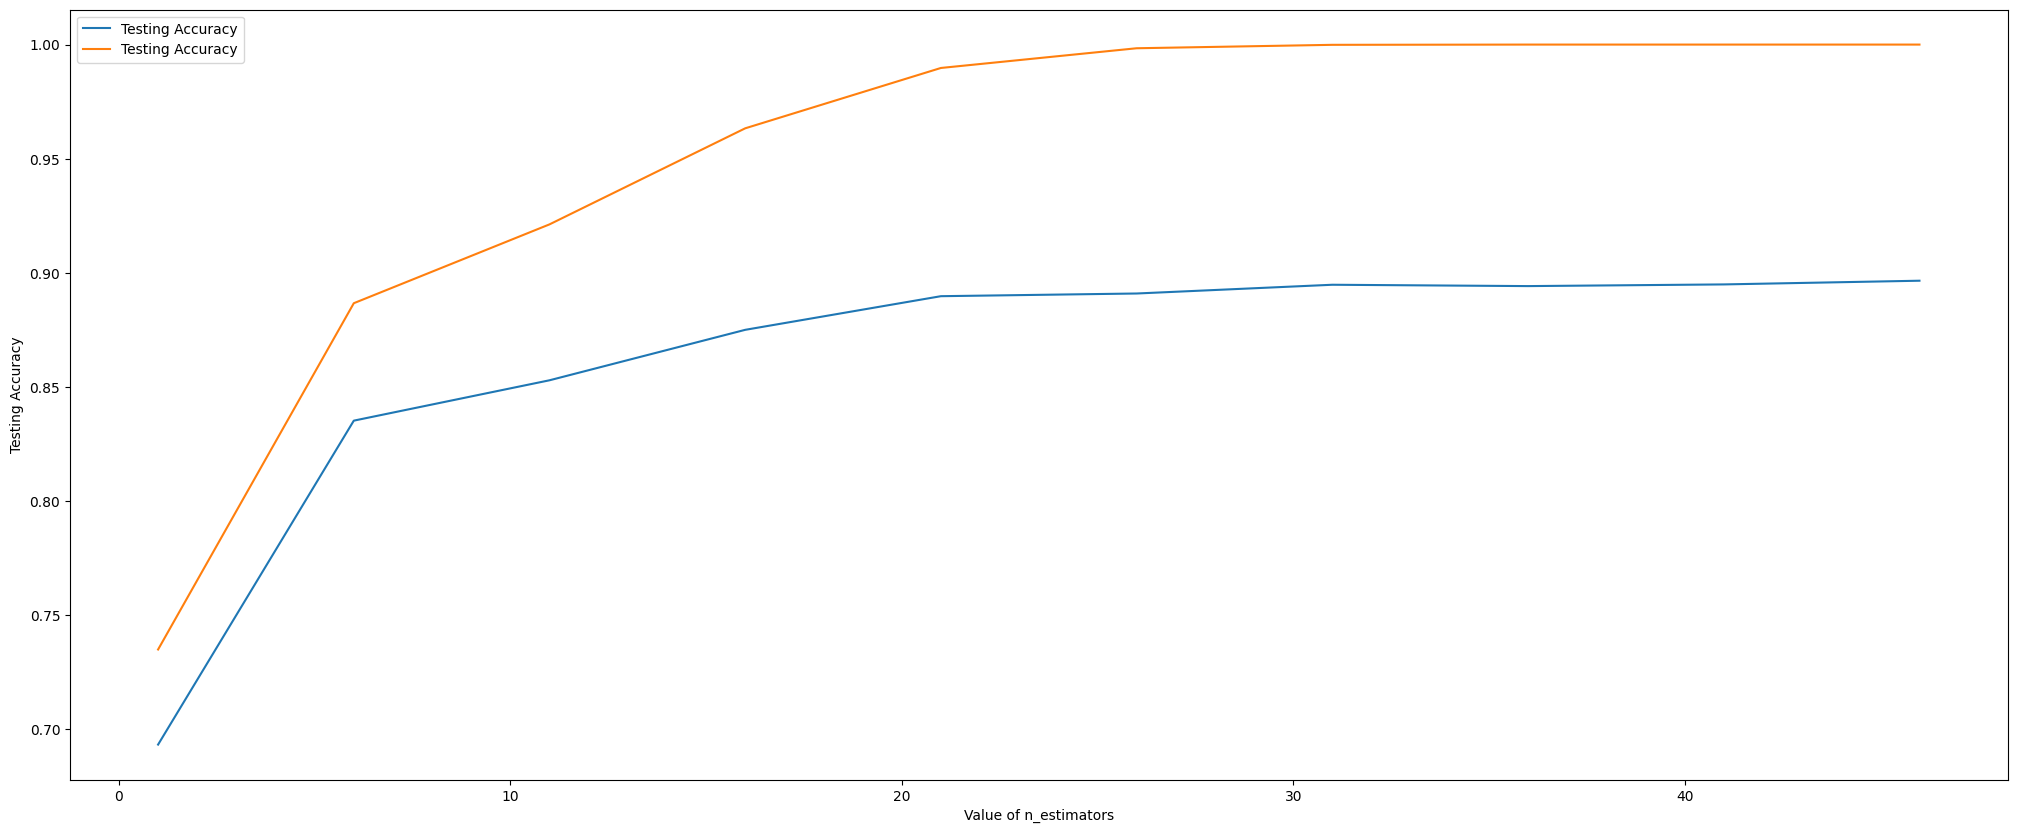

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [241]:

rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.8916248894131524


In [242]:

rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.8928044824535535


In [243]:

rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.8916248894131524


#Evaluation metrics, Confusion Matrix and ROC Curve For best model


In [30]:
#ROC Curve Function

graph_attributes={
    "Font Size"  : 15,
    "Font Color" : "black",
    "Legend Font Size"  : 15,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}


def ploty_ROC(model,X,y,graph_attributes):

    lebel_dict={
    0: 'no',
    1: 'yes'
    }

    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=800, height=800,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()



def conf_mat(mod, X_, y_):
  y_pred = mod.predict(X_)
  cm = confusion_matrix(y_,y_pred)
  plt.figure(figsize = (8,4))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
  plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

#Best Models Performence Matrix

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada_best_estimator = AdaBoostClassifier(n_estimators=146,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)


print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5995
           1       0.49      0.64      0.56       787

    accuracy                           0.88      6782
   macro avg       0.72      0.77      0.74      6782
weighted avg       0.90      0.88      0.89      6782

Accurecy:  0.8821881450899439


In [32]:
ploty_ROC(ada_best_estimator,X_test,y_test,graph_attributes)

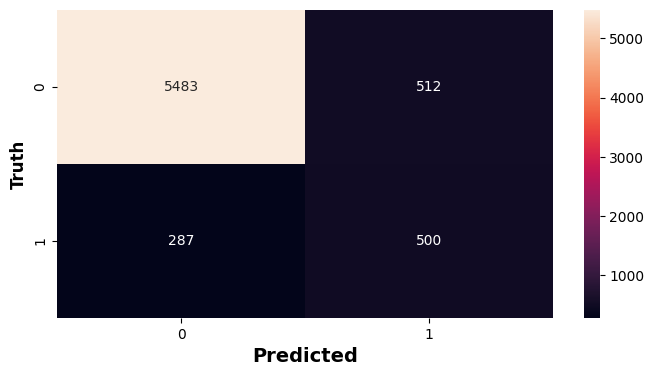

In [33]:
conf_mat(ada_best_estimator, X_test, y_test)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoost_all = GradientBoostingClassifier(n_estimators=381,max_depth=6,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5995
           1       0.58      0.58      0.58       787

    accuracy                           0.90      6782
   macro avg       0.76      0.76      0.76      6782
weighted avg       0.90      0.90      0.90      6782

Accurecy:  0.9031259215570628


In [35]:
ploty_ROC(gradBoost_all,X_test,y_test,graph_attributes)

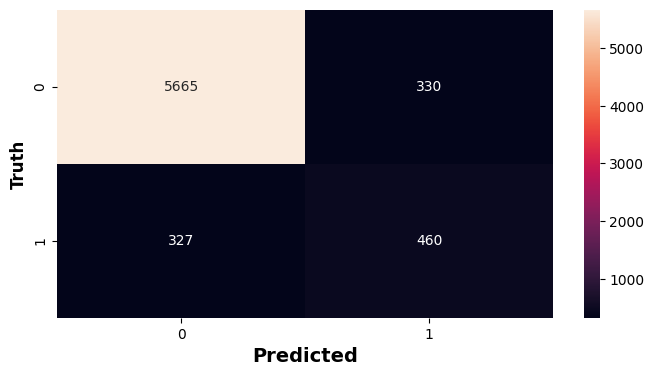

In [36]:
conf_mat(gradBoost_all, X_test, y_test)

In [37]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(max_depth = 66)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)

print(classification_report(y_test.values,y_pred))
print("Accurecy: ",accuracy_score(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5995
           1       0.56      0.57      0.56       787

    accuracy                           0.90      6782
   macro avg       0.75      0.76      0.75      6782
weighted avg       0.90      0.90      0.90      6782

Accurecy:  0.8975228546151578


In [38]:
ploty_ROC(xgb_deafult,X_test,y_test,graph_attributes)

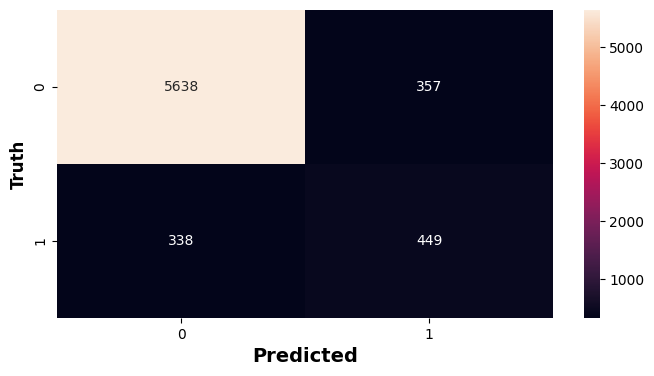

In [39]:
conf_mat(xgb_deafult, X_test, y_test)

#Balancing in Testing Data

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_test, y_test= smote.fit_resample(X_test, y_test)

In [55]:
ada_best_estimator = AdaBoostClassifier(n_estimators=146,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)


print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5995
           1       0.91      0.92      0.92      5995

    accuracy                           0.92     11990
   macro avg       0.92      0.92      0.92     11990
weighted avg       0.92      0.92      0.92     11990

Accurecy:  0.9160967472894078


In [56]:
ploty_ROC(ada_best_estimator,X_test,y_test,graph_attributes)

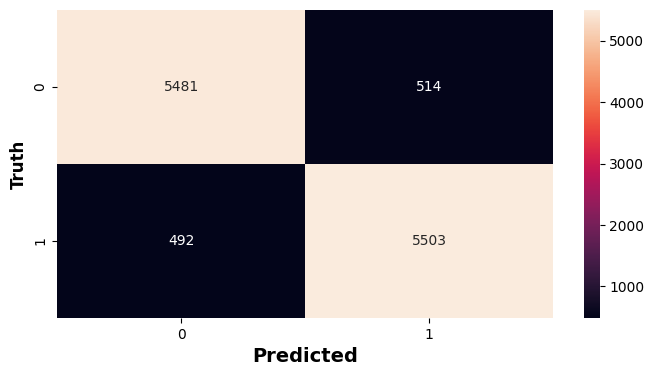

In [57]:
conf_mat(ada_best_estimator, X_test, y_test)

In [58]:
gradBoost_all = GradientBoostingClassifier(n_estimators=381,max_depth=6,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5995
           1       0.94      0.94      0.94      5995

    accuracy                           0.94     11990
   macro avg       0.94      0.94      0.94     11990
weighted avg       0.94      0.94      0.94     11990

Accurecy:  0.9438698915763136


In [59]:
ploty_ROC(gradBoost_all,X_test,y_test,graph_attributes)

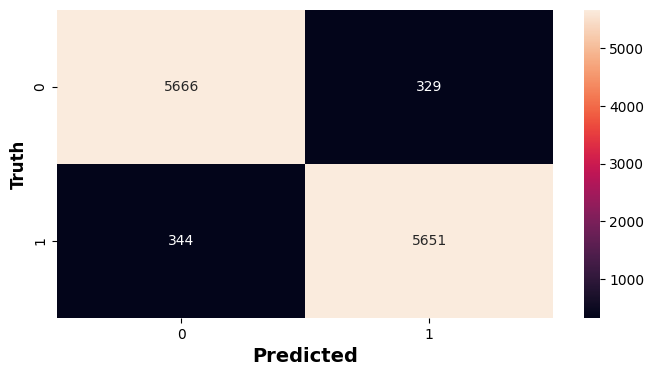

In [60]:
conf_mat(gradBoost_all, X_test, y_test)

In [61]:
xgb_deafult = xgb.XGBClassifier(max_depth = 66)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)

print(classification_report(y_test.values,y_pred))
print("Accurecy: ",accuracy_score(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5995
           1       0.94      0.92      0.93      5995

    accuracy                           0.93     11990
   macro avg       0.93      0.93      0.93     11990
weighted avg       0.93      0.93      0.93     11990

Accurecy:  0.9297748123436197


In [62]:
ploty_ROC(xgb_deafult,X_test,y_test,graph_attributes)

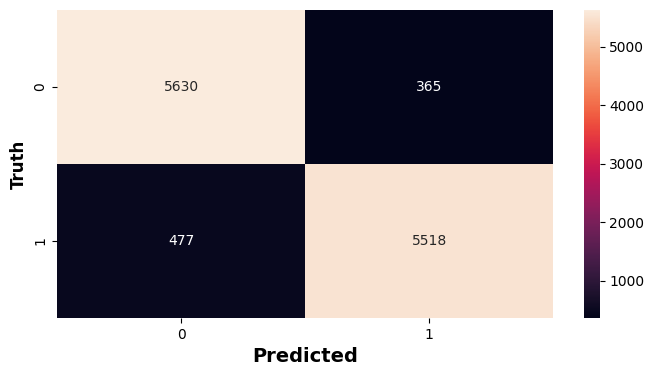

In [70]:
conf_mat(xgb_deafult, X_test, y_test)